# Optimum Iris Classification of the Cluster

Steps:

1. Importing all the required libraries
2. Reading the Dataset
3. Data Summarization
4. Data Visualization
5. Splitting the Dataset into Training and Testing
6. Predicting the Values 

# Importing all the required libraries

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/iris-dataset/Iris.csv


# Reading the Dataset

In [14]:
df = pd.read_csv('/kaggle/input/iris-dataset/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Sepal:** The outer parts of the flower (often green and leaf-like) that enclose a developing bud.

**Petal:** The parts of a flower that are often conspicuously colored.

# Data Summarization

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
#check corr realtioship of the dataset
df.corr()

/tmp/ipykernel_34/522385652.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [20]:
#check mathematic relation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


# Data Visualization

/tmp/ipykernel_34/453915198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr ()


<AxesSubplot: >

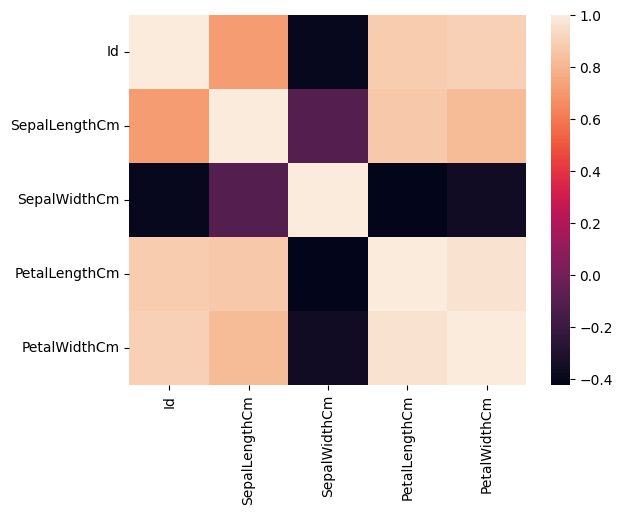

In [21]:
import seaborn  
correlation = df.corr ()  
seaborn.heatmap (correlation)  

/tmp/ipykernel_34/1890050093.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<AxesSubplot: >

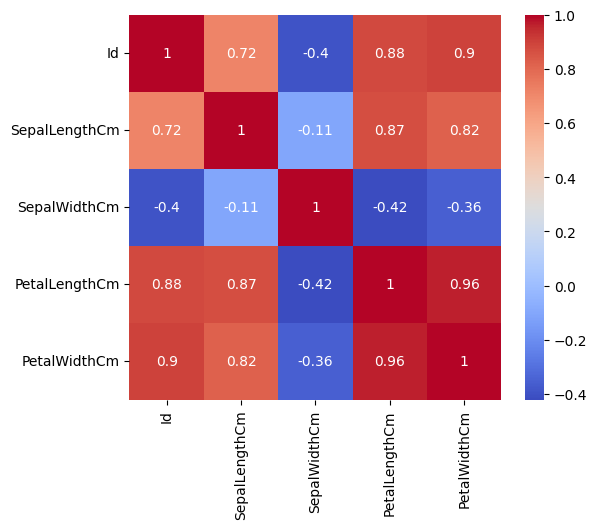

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
#Heat map
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

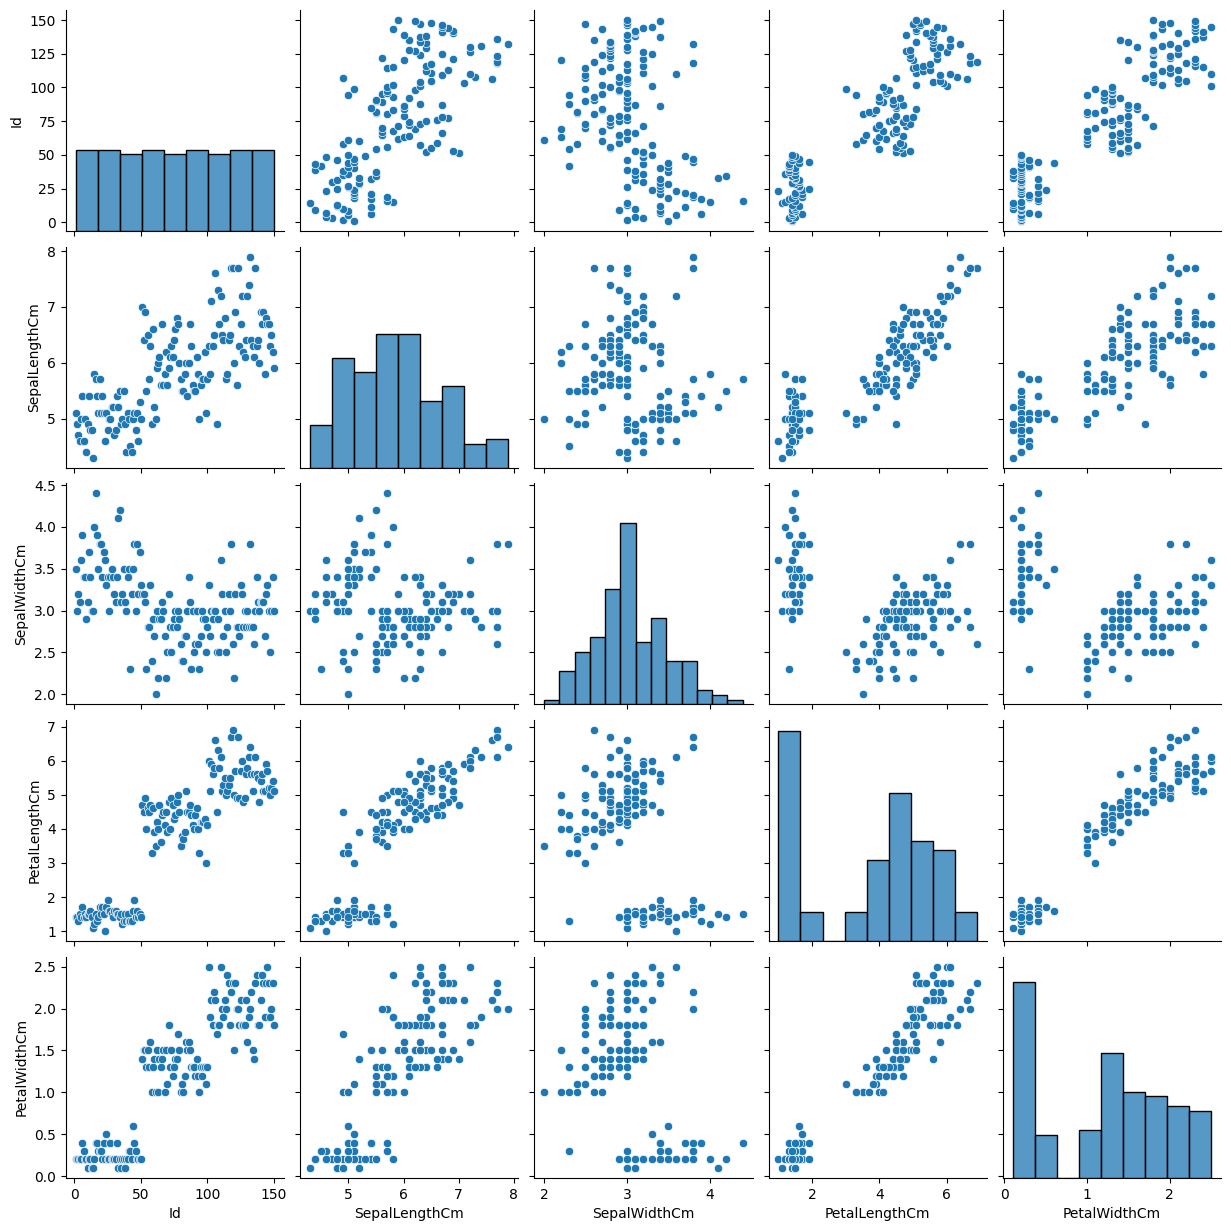

In [55]:
sns.pairplot(df)

/tmp/ipykernel_34/3136367820.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


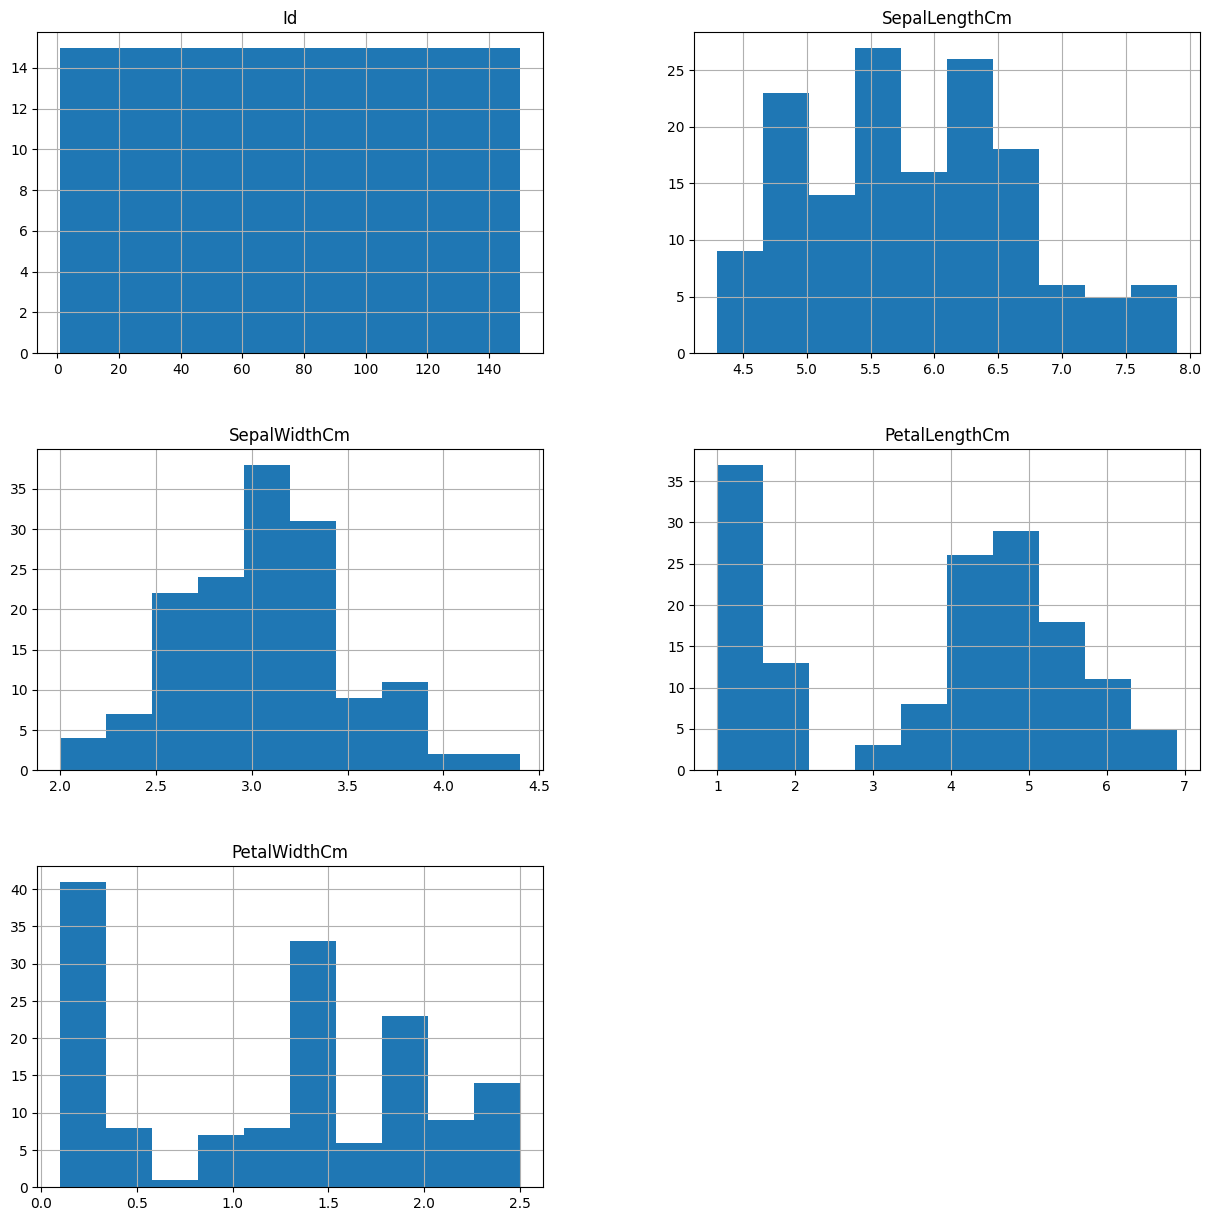

In [52]:
# histograms
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df.hist(ax = ax)
plt.show()

array([[<AxesSubplot: xlabel='Id', ylabel='Id'>,
        <AxesSubplot: xlabel='SepalLengthCm', ylabel='Id'>,
        <AxesSubplot: xlabel='SepalWidthCm', ylabel='Id'>,
        <AxesSubplot: xlabel='PetalLengthCm', ylabel='Id'>,
        <AxesSubplot: xlabel='PetalWidthCm', ylabel='Id'>],
       [<AxesSubplot: xlabel='Id', ylabel='SepalLengthCm'>,
        <AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<AxesSubplot: xlabel='Id', ylabel='SepalWidthCm'>,
        <AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<AxesSubplot: xlabel='I

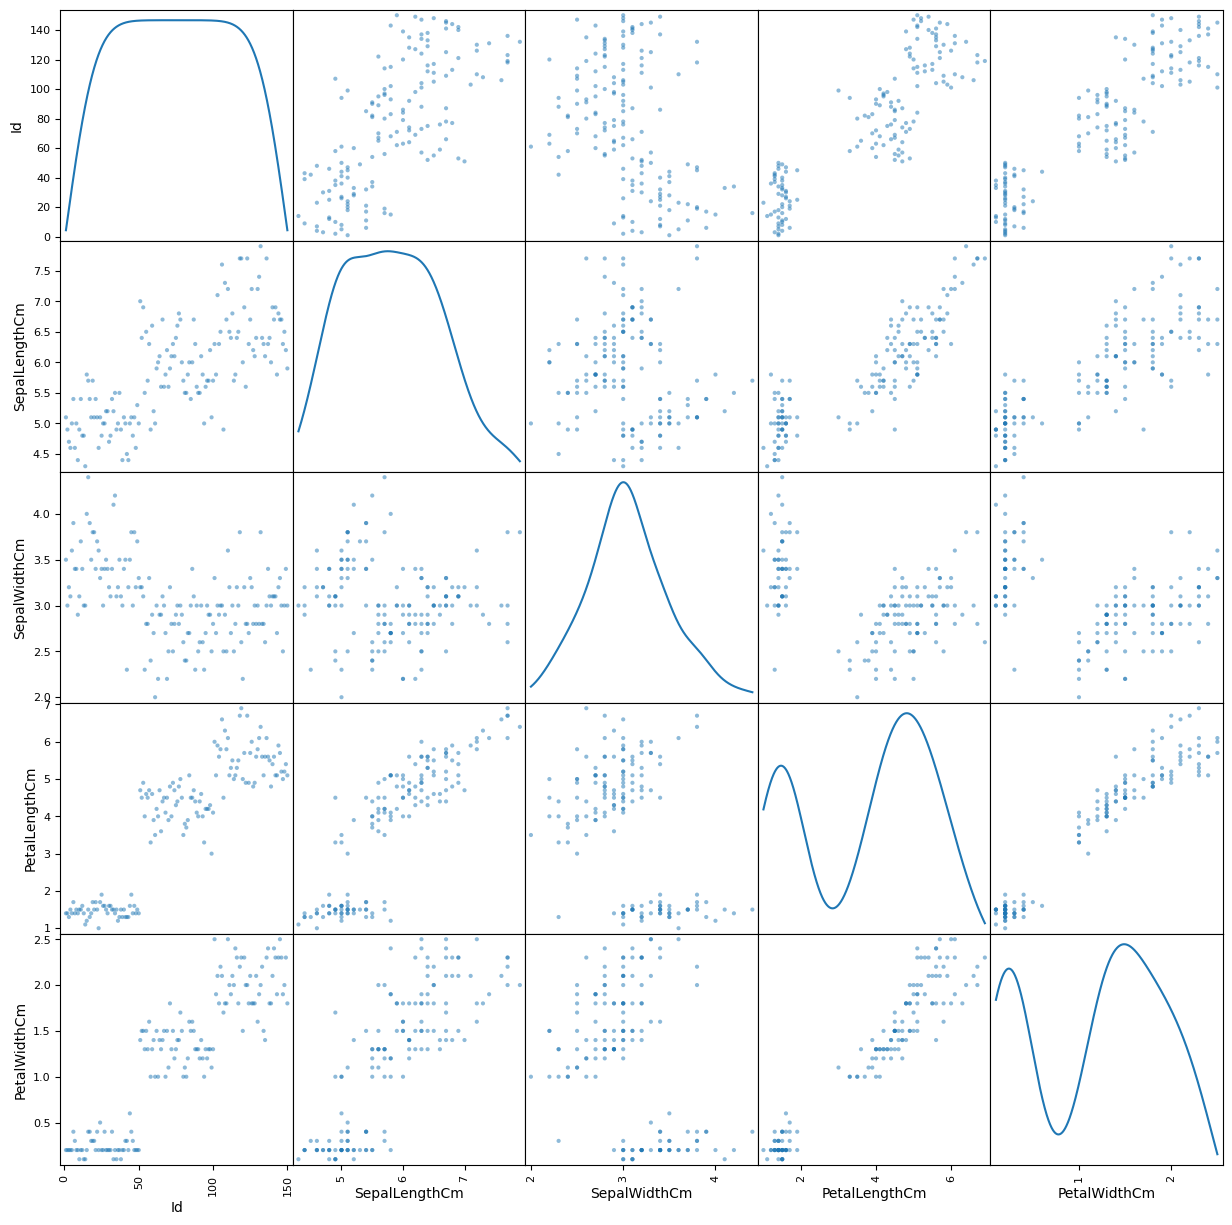

In [53]:
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(15, 15))

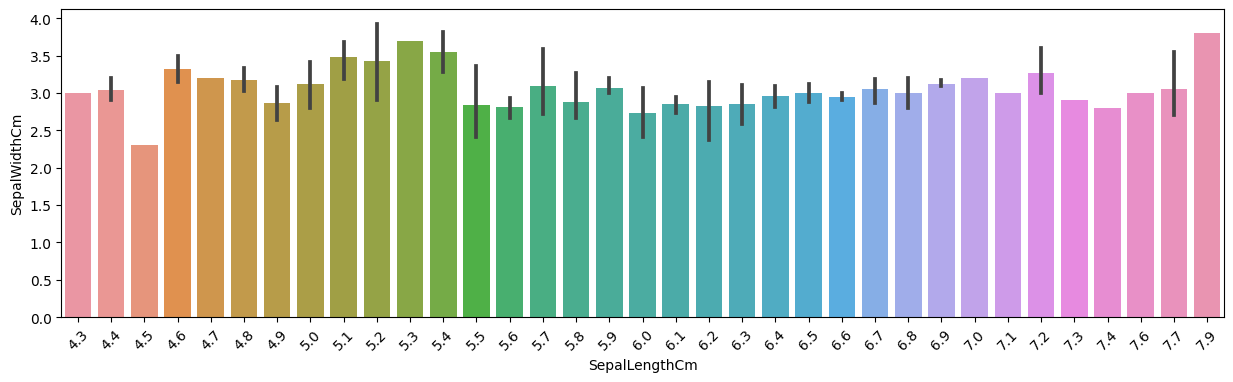

In [27]:

plt.figure(figsize=(15,4))
sns.barplot(data=df,x='SepalLengthCm',y='SepalWidthCm')
plt.xticks(rotation=45)
plt.show()

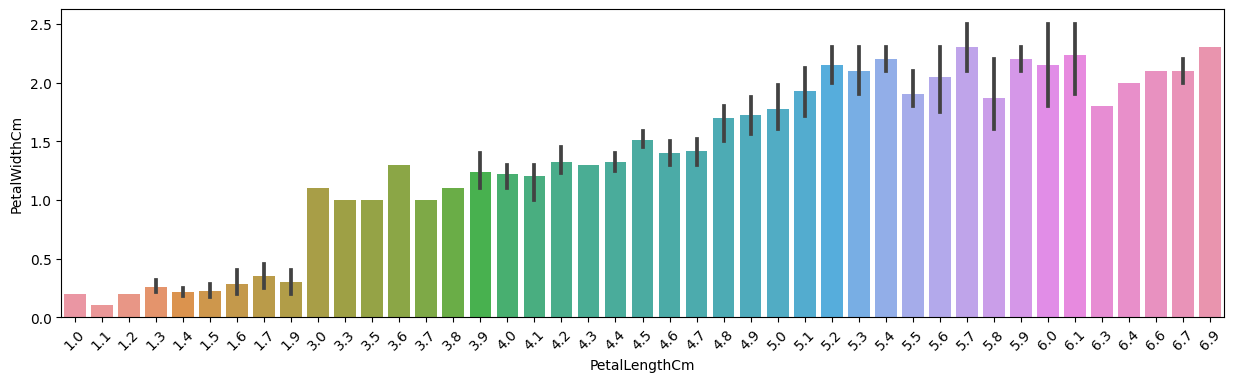

In [28]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='PetalLengthCm',y='PetalWidthCm')
plt.xticks(rotation=45)
plt.show()

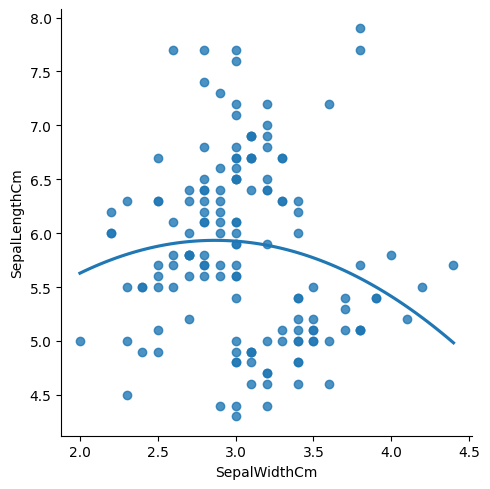

In [31]:
#plotting the Scatter plot to check relationship between SepalWidthCm and SepalLengthCm
sns.lmplot(x ="SepalWidthCm", y ="SepalLengthCm", data = df, order = 2, ci = None)
plt.show()


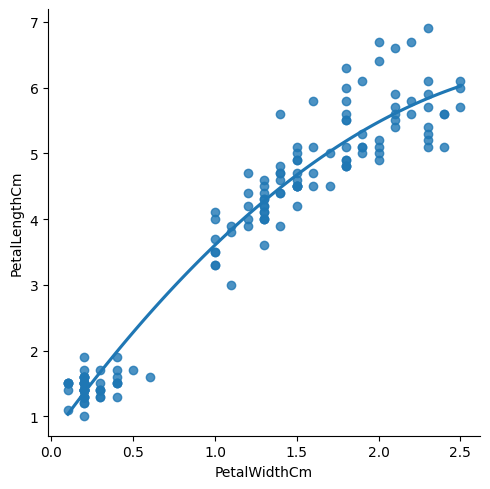

In [32]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="PetalWidthCm", y ="PetalLengthCm", data = df, order = 2, ci = None)
plt.show()


# Splitting the Data into Training and Testing

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Species"]).values
Y = df["Species"].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(112, 5)
(38, 5)


In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Splitting the data into training and testing data
lr = LogisticRegression(solver='lbfgs', max_iter=100)
 
lr.fit(X_train, Y_train)
print(lr.score(X_test, Y_test))

0.9473684210526315


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
y_pred = lr.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

# Predicting the Values

In [36]:

new_data_point = [[1.25, 2.3, 4.1, 1.4, 2.2]] 

# use the predict method to make a prediction on the new data point
prediction = lr.predict(new_data_point)

print(prediction)

['Iris-setosa']


In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(classifier.score(X_test, Y_test))

1.0


[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

1.0


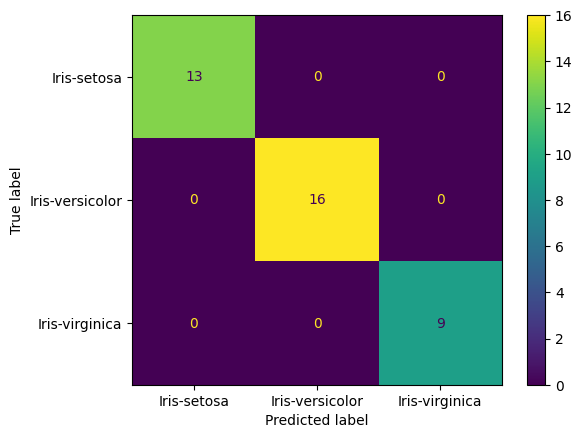

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

In [42]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=10).fit(X_train,Y_train)
Y_pred_tree = decisionTree.predict(X_test)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


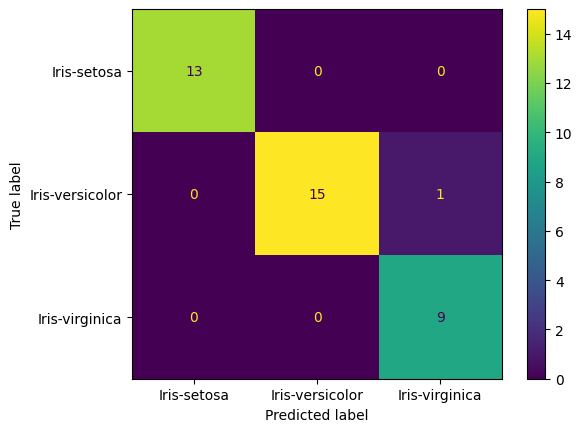

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_tree))
print(classification_report(Y_test,Y_pred_tree))
print(accuracy_score(Y_test,Y_pred_tree))


In [44]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50,criterion='entropy')
clf.fit(X_train,Y_train)
predictions=clf.predict(X_train)

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



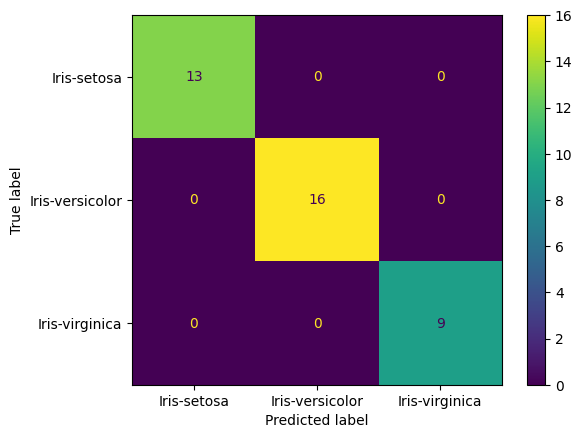

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


In [46]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



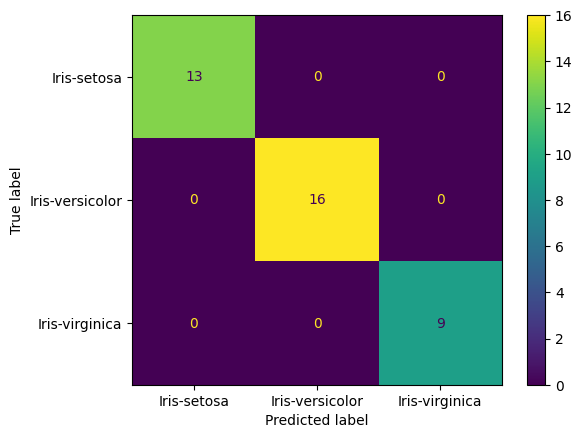

In [47]:
 from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))